In [1]:
import os
path = os.path.normpath(os.getcwd() + os.sep + os.pardir)
os.chdir(path)
path

'C:\\Users\\user\\Desktop\\Anuranan\\KFSC-Python'

In [2]:
!pip install soyclustering

In [3]:
import time
from multiprocessing import Pool
import multiprocessing
import numpy as np
import pandas as pd
import scipy.io as sio
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import accuracy_score
from BestMap import BestMap
from KFSC import KFSC
from KFSC_LARGE import KFSC_LARGE
from KFSC_minibatch import KFSC_MB
from multi_tester import test_dataset

In [4]:
# dataset = 'mnist_sc_f150.mat'
dataset = 'fmnist_fea_150.mat'
# dataset = 'covtype.mat'
# dataset = 'PokerHand2.mat'
# dataset = 'Postures_m.mat'
# dataset = 'Epileptic.mat'
f = sio.loadmat(dataset)
X = f['X']
label = np.concatenate(f['Label'])
k = len(np.unique(label))
cpu_count = multiprocessing.cpu_count()
use_cpu = 23
print("CPU count: ", cpu_count)
print("Using CPU: ", use_cpu)

CPU count:  48
Using CPU:  23


In [5]:
iterations = 23
funct_to_run = KFSC_MB
params = {}
params["opt"] = {
    'solver': 2,
    'maxiter': 300,
    'tol': 1e-4,
    'init_type': 'k-means-cos',
    'nrep_kmeans': 1,
    'classifier': 're'
}
# params["opt"]['batch_size'] = 5*np.logspace(1, 3, iterations, dtype=int)

In [6]:
# params["opt"]['batch_size']

In [7]:
# [] + [X, k, label, funct_to_run, dataset]

In [8]:
arg_list = []
for i in range(iterations):
    arg_list.append([])
    arg_list[-1] += [X, k, label, funct_to_run, dataset]
    print(arg_list[-1])
    build_dict = {}
#     for key in params.keys():
#         build_dict[key] = params[key][i]
    build_dict['opt'] = {}
    for key in params['opt'].keys():
        if key == 'batch_size':         
            build_dict['opt'][key] = params['opt'][key][i]
        else:
            build_dict['opt'][key] = params['opt'][key]
            
    arg_list[-1].append(build_dict)
    arg_list[-1] = tuple(arg_list[-1])
arg_list[20]

[array([[-0.00387764, -0.00383456, -0.00388697, ..., -0.00381669,
        -0.0038033 , -0.00385804],
       [ 0.00496426,  0.00481199,  0.00382726, ...,  0.0016532 ,
         0.002295  ,  0.00102705],
       [ 0.00201634,  0.00390121, -0.00173864, ...,  0.00275295,
         0.00379308,  0.00297695],
       ...,
       [ 0.00123876, -0.00027094, -0.00446999, ...,  0.00798547,
        -0.00255349,  0.00164713],
       [-0.00111287,  0.0035701 ,  0.00267775, ..., -0.00352793,
        -0.00591071, -0.00205644],
       [-0.00151471, -0.00544073,  0.00094182, ..., -0.0024999 ,
        -0.00646517, -0.00016609]]), 10, array([0, 0, 0, ..., 9, 9, 9], dtype=uint8), <function KFSC_MB at 0x000001FD1ECA61F0>, 'mnist_sc_f150.mat']
[array([[-0.00387764, -0.00383456, -0.00388697, ..., -0.00381669,
        -0.0038033 , -0.00385804],
       [ 0.00496426,  0.00481199,  0.00382726, ...,  0.0016532 ,
         0.002295  ,  0.00102705],
       [ 0.00201634,  0.00390121, -0.00173864, ...,  0.00275295,
       

(array([[-0.00387764, -0.00383456, -0.00388697, ..., -0.00381669,
         -0.0038033 , -0.00385804],
        [ 0.00496426,  0.00481199,  0.00382726, ...,  0.0016532 ,
          0.002295  ,  0.00102705],
        [ 0.00201634,  0.00390121, -0.00173864, ...,  0.00275295,
          0.00379308,  0.00297695],
        ...,
        [ 0.00123876, -0.00027094, -0.00446999, ...,  0.00798547,
         -0.00255349,  0.00164713],
        [-0.00111287,  0.0035701 ,  0.00267775, ..., -0.00352793,
         -0.00591071, -0.00205644],
        [-0.00151471, -0.00544073,  0.00094182, ..., -0.0024999 ,
         -0.00646517, -0.00016609]]),
 10,
 array([0, 0, 0, ..., 9, 9, 9], dtype=uint8),
 <function KFSC_minibatch.KFSC_MB(X, k, d, lamda, options: Optional[dict] = None)>,
 'mnist_sc_f150.mat',
 {'opt': {'solver': 2,
   'maxiter': 300,
   'tol': 0.0001,
   'init_type': 'k-means-cos',
   'nrep_kmeans': 1,
   'classifier': 're'}})

In [9]:
with Pool(processes=use_cpu) as p:
    df_list = p.starmap(test_dataset, arg_list)
combined_df = pd.concat(df_list, ignore_index=True)
path = os.getcwd()
os.chdir(path+'//Scores')
combined_df.to_csv(dataset.split('_')[0] + 'bulk_run_info.csv', mode='a', index=False, header=False)

In [10]:
combined_df

,Dataset,acc,nmi,time,d,lamda,opt,Function,parameters
0,mnist_sc_f150.mat,0.902443,0.851698,180.116129,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
1,mnist_sc_f150.mat,0.875057,0.816194,181.551803,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
2,mnist_sc_f150.mat,0.944543,0.888193,186.818599,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
3,mnist_sc_f150.mat,0.788771,0.779658,187.918751,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
4,mnist_sc_f150.mat,0.931686,0.863392,190.745298,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
5,mnist_sc_f150.mat,0.763400,0.766241,194.546552,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
6,mnist_sc_f150.mat,0.951471,0.893242,187.451810,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
7,mnist_sc_f150.mat,0.690186,0.778420,193.285108,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
8,mnist_sc_f150.mat,0.908029,0.866214,192.915735,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."
9,mnist_sc_f150.mat,0.924800,0.867068,197.331283,30,0.5,"{'solver': 2, 'maxiter': 300, 'tol': 0.0001, '...",KFSC_MB,"{'opt': {'solver': 2, 'maxiter': 300, 'tol': 0..."


In [11]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.titlesize':'xx-large'}
pylab.rcParams.update(params)

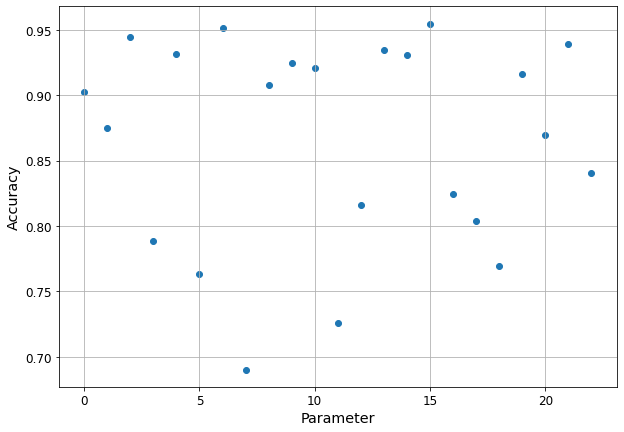

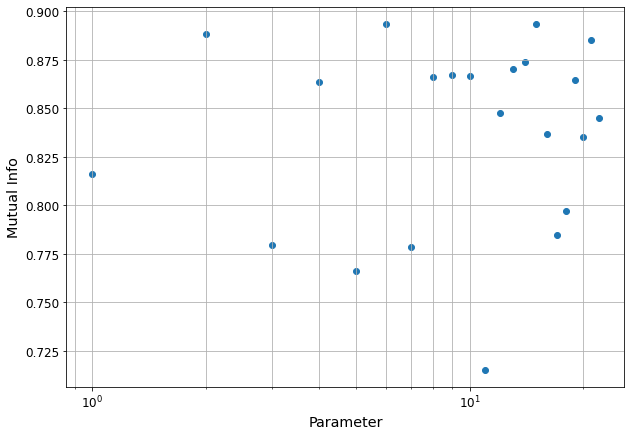

In [12]:
# xvals = [combined_df['parameters'][i]['nsel'] for 
#          i in range(len(list(combined_df['parameters'])))]
# xvals = [combined_df['parameters'][i]['opt']['batch_size'] for 
#          i in range(len(list(combined_df['parameters'])))]
xvals = np.arange(combined_df.shape[0])
plt.scatter(xvals, combined_df['acc'])
plt.ylabel("Accuracy"); plt.xlabel("Parameter")
# plt.xscale('log')
plt.grid(which='both')
plt.show()

plt.scatter(xvals, combined_df['nmi'])
plt.ylabel("Mutual Info"); plt.xlabel("Parameter")
plt.xscale('log')
plt.grid(which='both')
plt.show()